In [84]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import os
from datetime import datetime
import plotly.express as px

#import download

In [249]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")


In [13]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

In [15]:
def convert_to_date(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [36]:
aq_df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv",parse_dates=[['year','month','day','hour']], date_parser = convert_to_date,keep_date_col=True)

In [39]:
aq_df['month'] = pd.to_numeric(aq_df['month'])


In [250]:
aq_df.describe()

No         month         pm2.5          DEWP          TEMP  \
count  43824.000000  43824.000000  41757.000000  43824.000000  43824.000000   
mean   21912.500000      6.523549     98.613215      1.817246     12.448521   
std    12651.043435      3.448572     92.050387     14.433440     12.198613   
min        1.000000      1.000000      0.000000    -40.000000    -19.000000   
25%    10956.750000      4.000000     29.000000    -10.000000      2.000000   
50%    21912.500000      7.000000     72.000000      2.000000     14.000000   
75%    32868.250000     10.000000    137.000000     15.000000     23.000000   
max    43824.000000     12.000000    994.000000     28.000000     42.000000   

               PRES           Iws            Is            Ir  
count  43824.000000  43824.000000  43824.000000  43824.000000  
mean    1016.447654     23.889140      0.052734      0.194916  
std       10.268698     50.010635      0.760375      1.415867  
min      991.000000      0.450000      0.000000      0.000000  
25%     1008.000000      1.790000      0.000000      0.000000  
50%     1016.000000      5.370000      0.000000      0.000000  
75%     1025.000000     21.910000      0.000000      0.000000  
max     1046.000000    585.600000     27.000000     36.000000

In [44]:
aq_df_non_indexed = aq_df.copy()

In [45]:
aq_df = aq_df.set_index('year_month_day_hour')

In [70]:
aq_df.loc['2010' : '2010']

No  year  month day hour  pm2.5  DEWP  TEMP    PRES  \
year_month_day_hour                                                          
2010-01-01 00:00:00     1  2010      1   1    0    NaN   -21 -11.0  1021.0   
2010-01-01 01:00:00     2  2010      1   1    1    NaN   -21 -12.0  1020.0   
2010-01-01 02:00:00     3  2010      1   1    2    NaN   -21 -11.0  1019.0   
2010-01-01 03:00:00     4  2010      1   1    3    NaN   -21 -14.0  1019.0   
2010-01-01 04:00:00     5  2010      1   1    4    NaN   -20 -12.0  1018.0   
...                   ...   ...    ...  ..  ...    ...   ...   ...     ...   
2010-12-31 19:00:00  8756  2010     12  31   19   27.0   -20  -5.0  1030.0   
2010-12-31 20:00:00  8757  2010     12  31   20   17.0   -20  -6.0  1031.0   
2010-12-31 21:00:00  8758  2010     12  31   21   19.0   -21  -6.0  1031.0   
2010-12-31 22:00:00  8759  2010     12  31   22   16.0   -21  -7.0  1032.0   
2010-12-31 23:00:00  8760  2010     12  31   23   22.0   -21  -7.0  1033.0   

                    cbwd     Iws  Is  Ir  
year_month_day_hour                       
2010-01-01 00:00:00   NW    1.79   0   0  
2010-01-01 01:00:00   NW    4.92   0   0  
2010-01-01 02:00:00   NW    6.71   0   0  
2010-01-01 03:00:00   NW    9.84   0   0  
2010-01-01 04:00:00   NW   12.97   0   0  
...                  ...     ...  ..  ..  
2010-12-31 19:00:00   NW  534.65   0   0  
2010-12-31 20:00:00   NW  543.59   0   0  
2010-12-31 21:00:00   NW  552.53   0   0  
2010-12-31 22:00:00   NW  559.68   0   0  
2010-12-31 23:00:00   NW  565.49   0   0  

[8760 rows x 13 columns]

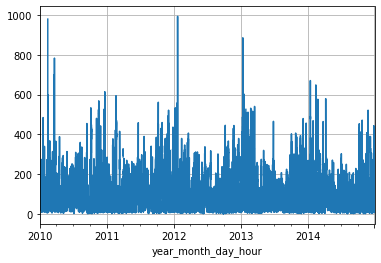

In [78]:
pm_data  = aq_df['pm2.5']
pm_data.plot(grid=True)

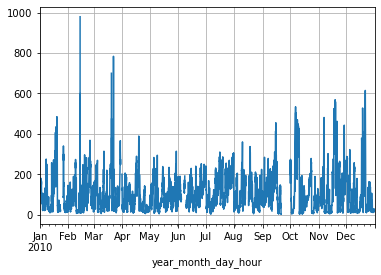

In [79]:
aq_data_2010 = aq_df.loc['2010']
pm_data_2010 = aq_data_2010['pm2.5']
pm_data_2010.plot(grid=True)

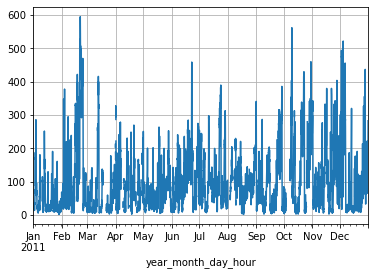

In [80]:
aq_data_2011 = aq_df.loc['2011']
pm_data_2011 = aq_data_2011['pm2.5']
pm_data_2011.plot(grid=True)

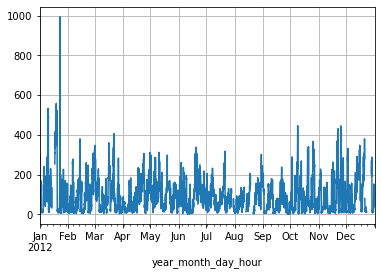

In [81]:
aq_data_2012 = aq_df.loc['2012']
pm_data_2012 = aq_data_2012['pm2.5']
pm_data_2012.plot(grid=True)

In [89]:
fig = px.line(x = aq_df_non_indexed['year_month_day_hour'],y = aq_df_non_indexed['pm2.5'], title='pm 2.5  with slider')
fig.update_xaxes(rangeslider_visible=True)    
fig.show()

In [96]:
fig = px.line(x = aq_df_non_indexed['year_month_day_hour'],y = aq_df_non_indexed['pm2.5'], title='pm 2.5  with slider')
fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label='1Y', step="year", stepmode="backward"),
            dict(count=2,label="2Y", step="year", stepmode="backward"),
            dict(count=3,label="3Y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show() 

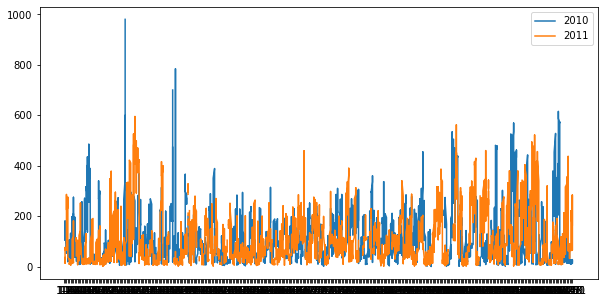

In [124]:
df_2010 = aq_df['2010'].reset_index()
df_2011 = aq_df['2011'].reset_index()
df_2010['month_day_hour'] = df_2010.apply(lambda x : str(x['month'])+"-"+x['day'],axis=1)
df_2011['month_day_hour'] = df_2011.apply(lambda x : str(x['month'])+"-"+x['day'],axis=1)
plt.figure(figsize=(10,5))
plt.plot(df_2010['month_day_hour'] , df_2010['pm2.5'])
plt.plot(df_2011['month_day_hour'] , df_2011['pm2.5'])
plt.legend(['2010','2011'])

In [112]:
df_2013


year_month_day_hour     No  year  month day hour  pm2.5  DEWP  TEMP  \
0    2013-01-01 00:00:00  26305  2013      1   1    0   35.0   -10  -5.0   
1    2013-01-01 01:00:00  26306  2013      1   1    1   31.0   -11  -7.0   
2    2013-01-01 02:00:00  26307  2013      1   1    2   32.0   -11  -7.0   
3    2013-01-01 03:00:00  26308  2013      1   1    3   21.0   -14 -10.0   
4    2013-01-01 04:00:00  26309  2013      1   1    4   16.0   -15 -10.0   
...                  ...    ...   ...    ...  ..  ...    ...   ...   ...   
8755 2013-12-31 19:00:00  35060  2013     12  31   19   22.0   -19   7.0   
8756 2013-12-31 20:00:00  35061  2013     12  31   20   18.0   -21   7.0   
8757 2013-12-31 21:00:00  35062  2013     12  31   21   23.0   -21   7.0   
8758 2013-12-31 22:00:00  35063  2013     12  31   22   20.0   -21   6.0   
8759 2013-12-31 23:00:00  35064  2013     12  31   23   23.0   -20   7.0   

        PRES cbwd     Iws  Is  Ir month_day_hour  
0     1018.0   NW    5.81   0   0              1  
1     1017.0   NW    9.83   0   0              1  
2     1017.0   NW   11.62   0   0              1  
3     1018.0   NW   14.75   0   0              1  
4     1018.0   cv    0.45   0   0              1  
...      ...  ...     ...  ..  ..            ...  
8755  1013.0   NW  114.87   0   0             12  
8756  1014.0   NW  119.79   0   0             12  
8757  1014.0   NW  125.60   0   0             12  
8758  1014.0   NW  130.52   0   0             12  
8759  1014.0   NW  137.67   0   0             12  

[8760 rows x 15 columns]

In [134]:
aq_df.loc["2012":"2014"][['month','pm2.5']].groupby('month').describe()

pm2.5                                                         
        count        mean         std  min    25%   50%     75%    max
month                                                                 
1      2146.0  144.521901  143.829460  6.0  35.00  95.0  198.00  994.0
2      2030.0  127.018719  122.324801  3.0  21.00  92.0  185.75  649.0
3      2222.0  110.130513   97.238776  3.0  24.00  88.0  163.75  541.0
4      2151.0   82.974895   63.178936  4.0  34.00  69.0  119.00  580.0
5      2160.0   82.673148   53.009552  5.0  43.00  74.0  110.00  320.0
6      2129.0   89.207140   64.905613  1.0  39.00  73.0  131.00  466.0
7      2162.0   79.706290   56.422460  6.0  34.00  67.0  112.00  318.0
8      2091.0   67.918699   48.847111  2.0  29.00  58.0   94.00  302.0
9      2146.0   73.703169   57.047708  0.0  26.00  62.0  109.00  298.0
10     2221.0  113.990545  104.315799  2.0  29.00  80.0  177.00  472.0
11     2122.0   94.333648   96.621436  2.0  17.25  55.5  147.75  522.0
12     2054.0   94.781402  100.471681  4.0  17.00  52.0  141.00  480.0

In [141]:
aq_df['2013':'2014'][['month','TEMP','pm2.5']].groupby('month').agg({'pm2.5':['max'], 'TEMP':['min','max']})

pm2.5  TEMP      
         max   min   max
month                   
1      886.0 -17.0  11.0
2      649.0 -15.0  16.0
3      541.0  -7.0  26.0
4      580.0  -1.0  30.0
5      320.0   6.0  42.0
6      466.0  14.0  38.0
7      303.0  19.0  38.0
8      209.0  14.0  37.0
9      298.0   7.0  34.0
10     472.0   1.0  25.0
11     522.0  -5.0  20.0
12     480.0 -11.0  15.0

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000974C2542B0>,
      dtype=object)

<Figure size 864x504 with 0 Axes>

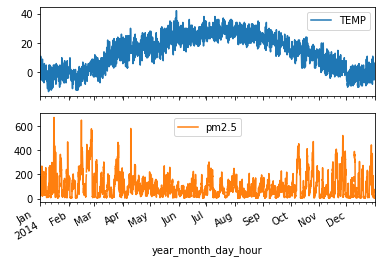

In [150]:
aq_df_2014 = aq_df.loc['2014']
aq_df_2014 = aq_df_2014[['TEMP','pm2.5']]
plt.figure(figsize=(12,7))
aq_df_2014.plot(subplots=True)

<Figure size 864x504 with 0 Axes>

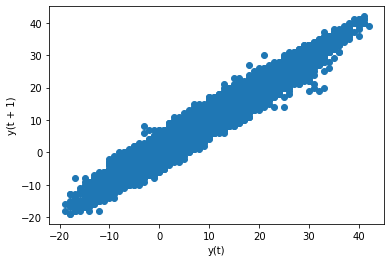

<Figure size 864x504 with 0 Axes>

In [160]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=1)
plt.figure(figsize=(12,7))


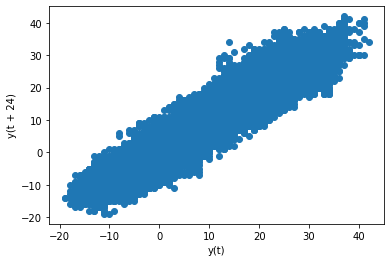

In [167]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=24)

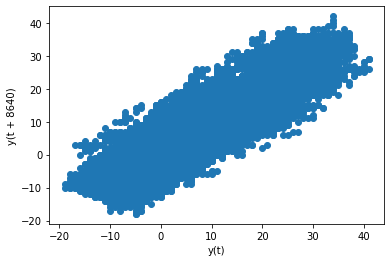

In [168]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=8640)

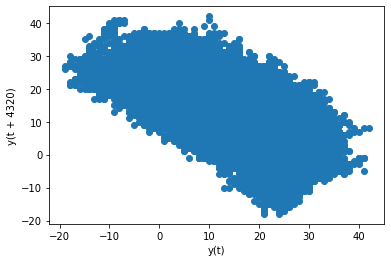

In [169]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=4320)

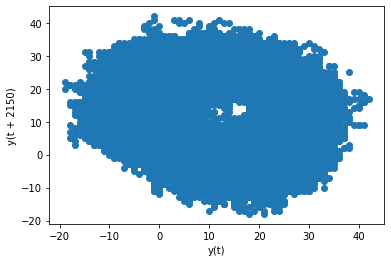

In [170]:
pd.plotting.lag_plot(aq_df['TEMP'],lag=2150)f

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000974EB59D68>,
      dtype=object)

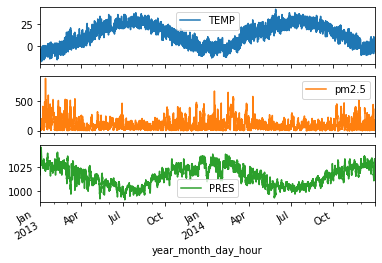

In [176]:
aq_df_2013 = aq_df.loc['2013':'2014']
pm_data_2013= aq_df_2013[['TEMP','pm2.5','PRES']]
pm_data_2013.plot(subplots=True)

In [192]:
aq_df_2014 = aq_df['2014']
aq_df_2014.isnull().sum()
aq_df_2014

No  year  month day hour  pm2.5  DEWP  TEMP    PRES  \
year_month_day_hour                                                           
2014-01-01 00:00:00  35065  2014      1   1    0   24.0   -20   7.0  1014.0   
2014-01-01 01:00:00  35066  2014      1   1    1   53.0   -20   7.0  1013.0   
2014-01-01 02:00:00  35067  2014      1   1    2   65.0   -20   6.0  1013.0   
2014-01-01 03:00:00  35068  2014      1   1    3   70.0   -20   6.0  1013.0   
2014-01-01 04:00:00  35069  2014      1   1    4   79.0   -18   3.0  1012.0   
...                    ...   ...    ...  ..  ...    ...   ...   ...     ...   
2014-12-31 19:00:00  43820  2014     12  31   19    8.0   -23  -2.0  1034.0   
2014-12-31 20:00:00  43821  2014     12  31   20   10.0   -22  -3.0  1034.0   
2014-12-31 21:00:00  43822  2014     12  31   21   10.0   -22  -3.0  1034.0   
2014-12-31 22:00:00  43823  2014     12  31   22    8.0   -22  -4.0  1034.0   
2014-12-31 23:00:00  43824  2014     12  31   23   12.0   -21  -3.0  1034.0   

                    cbwd     Iws  Is  Ir  
year_month_day_hour                       
2014-01-01 00:00:00   NW  143.48   0   0  
2014-01-01 01:00:00   NW  147.50   0   0  
2014-01-01 02:00:00   NW  151.52   0   0  
2014-01-01 03:00:00   NW  153.31   0   0  
2014-01-01 04:00:00   cv    0.89   0   0  
...                  ...     ...  ..  ..  
2014-12-31 19:00:00   NW  231.97   0   0  
2014-12-31 20:00:00   NW  237.78   0   0  
2014-12-31 21:00:00   NW  242.70   0   0  
2014-12-31 22:00:00   NW  246.72   0   0  
2014-12-31 23:00:00   NW  249.85   0   0  

[8760 rows x 13 columns]

In [195]:
aq_df_2014.isnull().any()
#aq_df_2014.isnull().values.any()


No       False
year     False
month    False
day      False
hour     False
pm2.5     True
DEWP     False
TEMP     False
PRES     False
cbwd     False
Iws      False
Is       False
Ir       False
dtype: bool

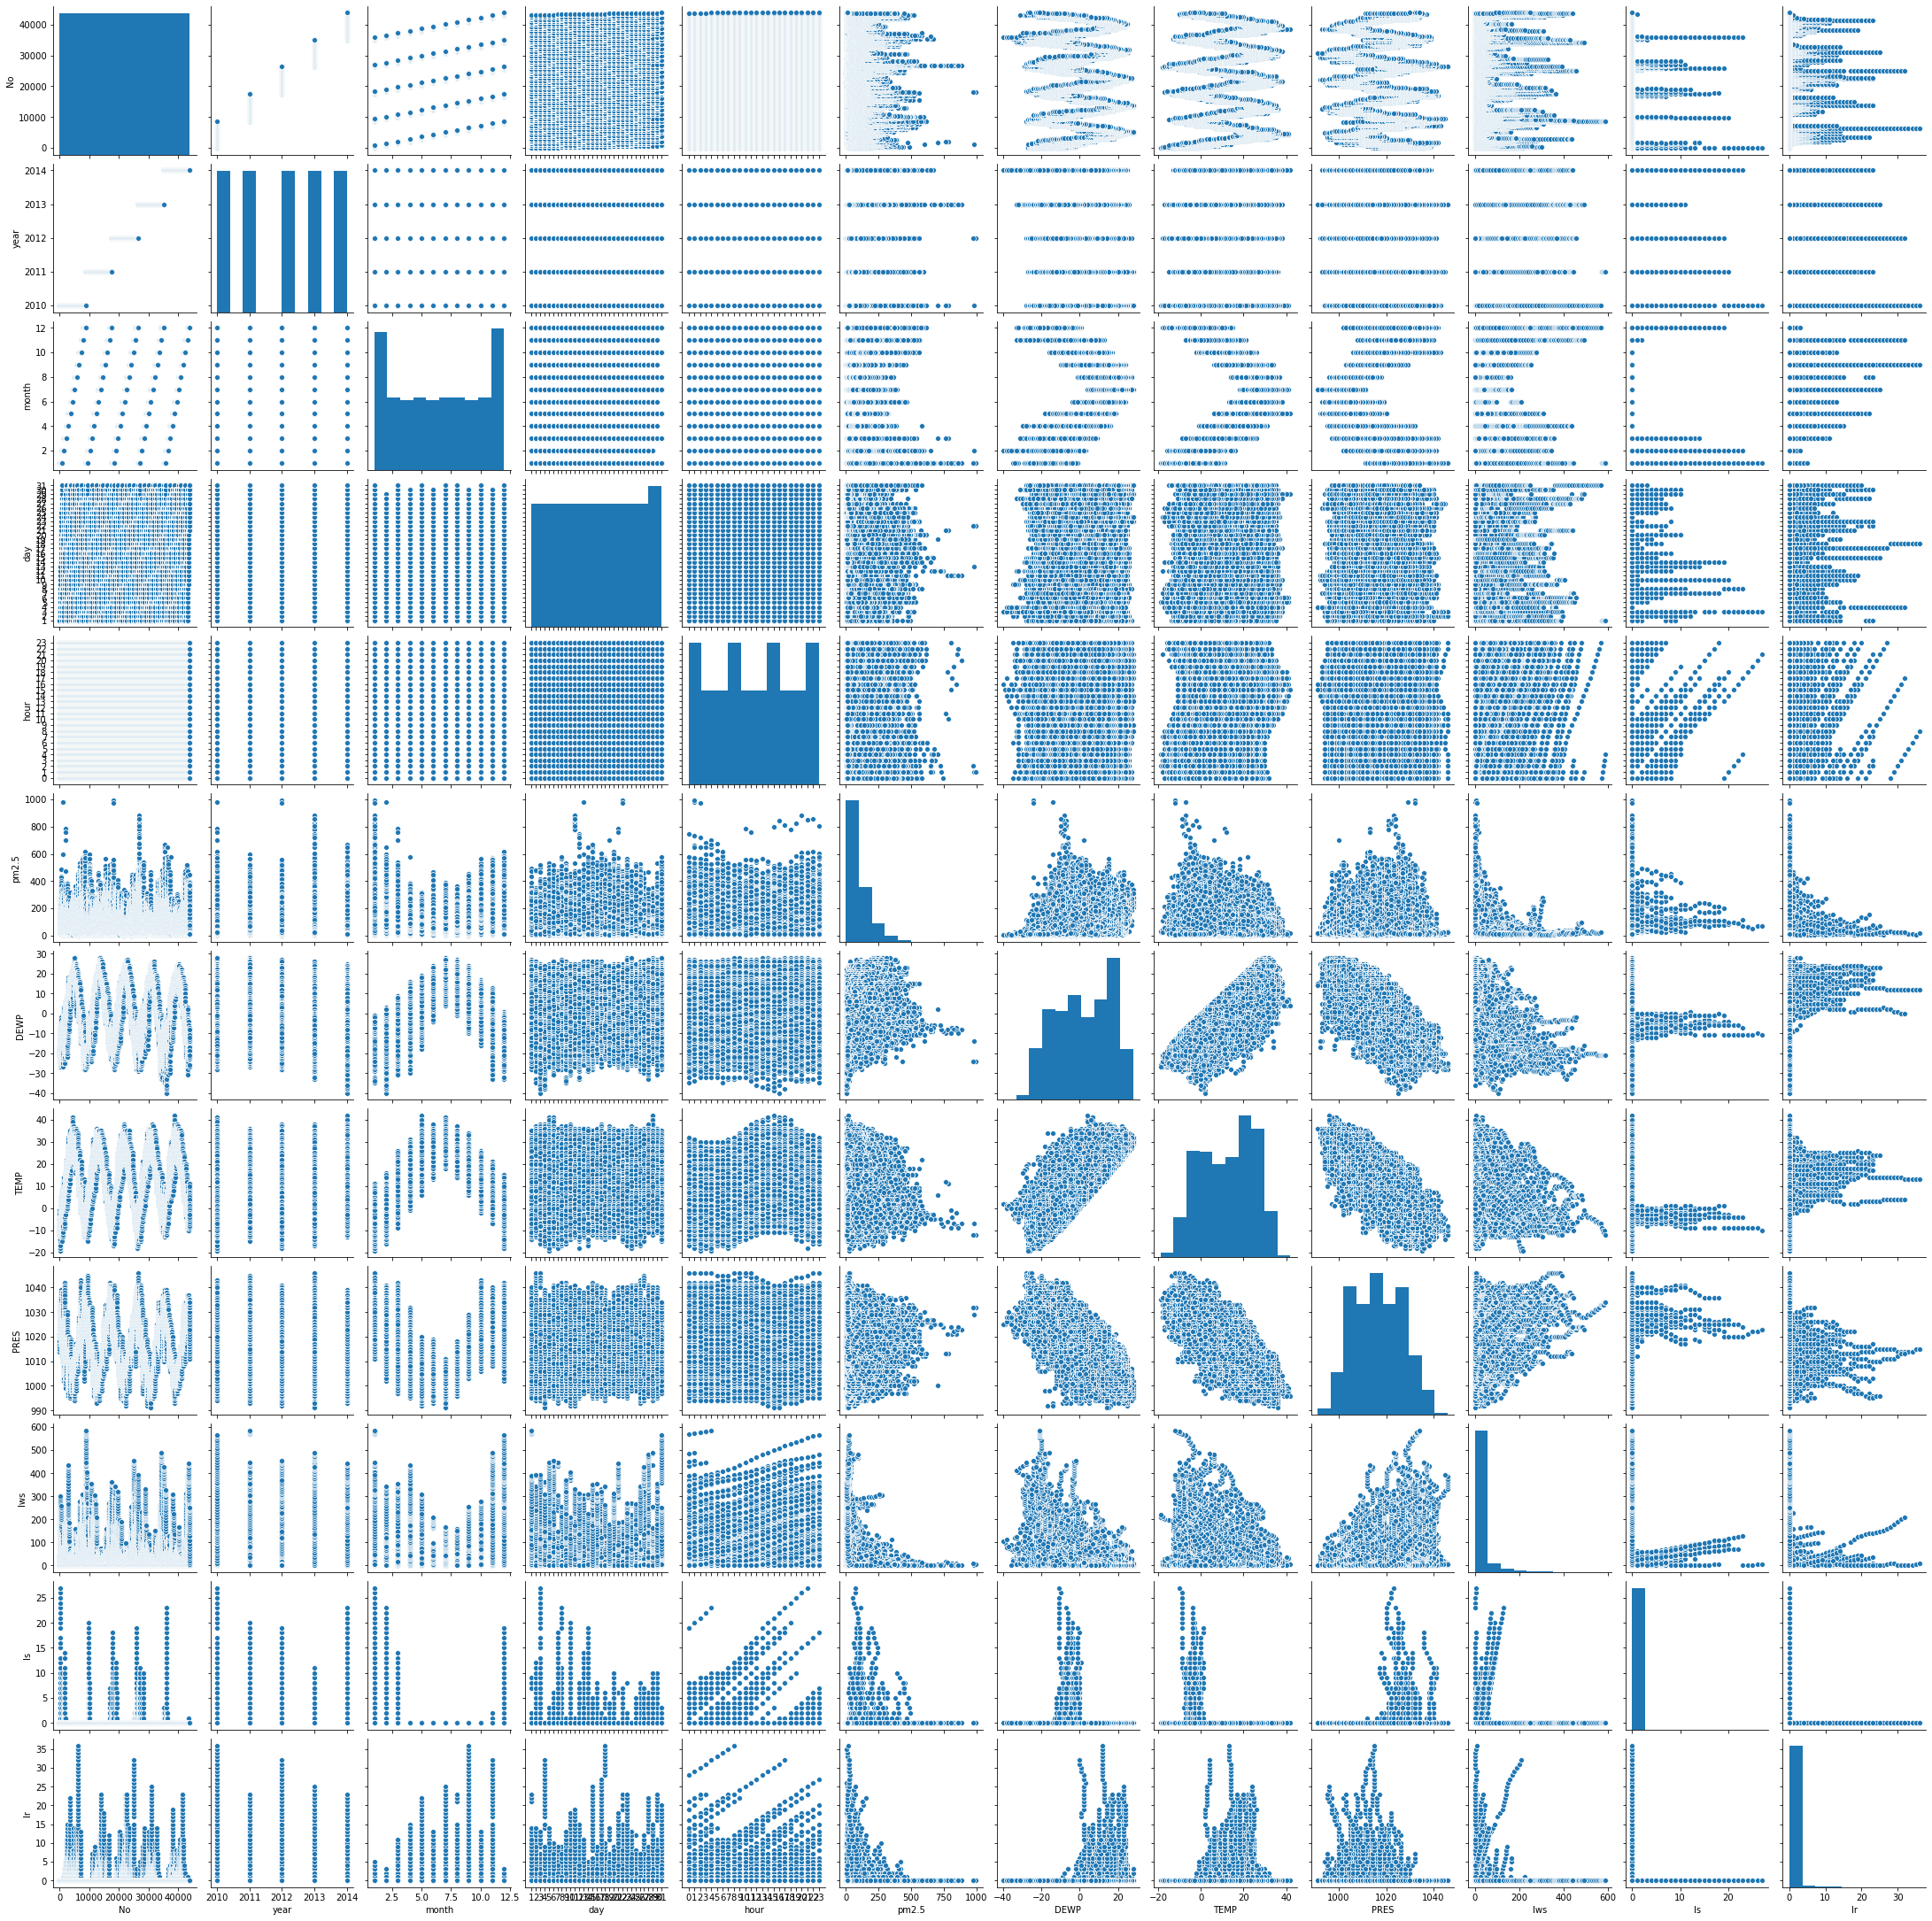

In [199]:
sns.pairplot(aq_df)

In [197]:
aq_df.corr(method='pearson')

No     month     pm2.5      DEWP      TEMP      PRES       Iws  \
No     1.000000  0.199301 -0.017706  0.047668  0.078159 -0.024224 -0.062427   
month  0.199301  1.000000 -0.024069  0.233975  0.170093 -0.062185  0.003043   
pm2.5 -0.017706 -0.024069  1.000000  0.171423 -0.090534 -0.047282 -0.247784   
DEWP   0.047668  0.233975  0.171423  1.000000  0.824633 -0.778346 -0.296399   
TEMP   0.078159  0.170093 -0.090534  0.824633  1.000000 -0.826690 -0.154623   
PRES  -0.024224 -0.062185 -0.047282 -0.778346 -0.826690  1.000000  0.185355   
Iws   -0.062427  0.003043 -0.247784 -0.296399 -0.154623  0.185355  1.000000   
Is    -0.029464 -0.061672  0.019266 -0.034410 -0.092601  0.069028  0.021883   
Ir    -0.016563  0.036737 -0.051369  0.125090  0.049121 -0.079843 -0.010122   

             Is        Ir  
No    -0.029464 -0.016563  
month -0.061672  0.036737  
pm2.5  0.019266 -0.051369  
DEWP  -0.034410  0.125090  
TEMP  -0.092601  0.049121  
PRES   0.069028 -0.079843  
Iws    0.021883 -0.010122  
Is     1.000000 -0.009548  
Ir    -0.009548  1.000000

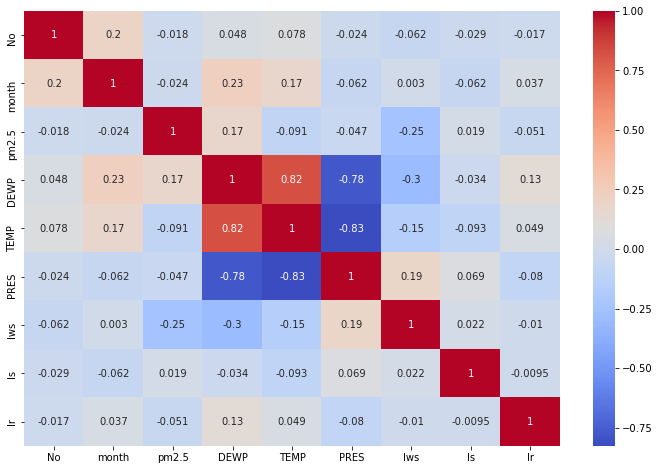

In [207]:
plt.figure(figsize=(12,8))
sns.heatmap(aq_df.corr(),annot=True,cmap='coolwarm')

In [209]:
aq_df_na = aq_df.copy()
aq_df_na.dropna(inplace=True)


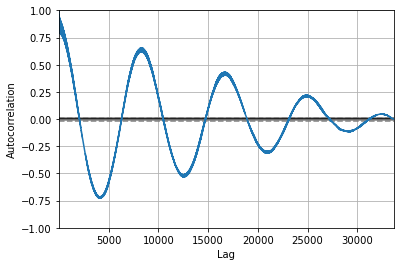

In [222]:
pd.plotting.autocorrelation_plot(aq_df_na['2011':'2014']['TEMP'])

In [226]:
aq_df_na['TEMP'].resample("1m").mean()

year_month_day_hour
2010-01-31    -6.364472
2010-02-28    -1.918033
2010-03-31     2.983075
2010-04-30    10.805014
2010-05-31    20.856174
2010-06-30    24.458407
2010-07-31    27.729839
2010-08-31    25.337278
2010-09-30    22.224359
2010-10-31    12.280323
2010-11-30     3.289157
2010-12-31    -2.064516
2011-01-31    -5.543155
2011-02-28    -0.854167
2011-03-31     6.993600
2011-04-30    14.684701
2011-05-31    20.730337
2011-06-30    25.630098
2011-07-31    26.464238
2011-08-31    25.657895
2011-09-30    19.223922
2011-10-31    13.214286
2011-11-30     5.946853
2011-12-31    -2.308210
2012-01-31    -4.943284
2012-02-29    -2.584058
2012-03-31     5.066216
2012-04-30    15.463143
2012-05-31    21.930535
2012-06-30    24.334746
2012-07-31    26.568314
2012-08-31    25.542536
2012-09-30    20.119048
2012-10-31    13.306757
2012-11-30     3.687679
2012-12-31    -4.366450
2013-01-31    -5.381597
2013-02-28    -1.825633
2013-03-31     5.397835
2013-04-30    12.232168
2013-05-31    21.482

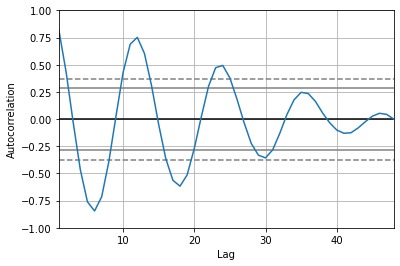

In [230]:
pd.plotting.autocorrelation_plot(aq_df_na['2011':'2014']['TEMP'].resample('1m').mean())

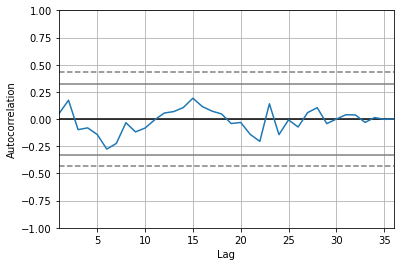

In [234]:
pd.plotting.autocorrelation_plot(aq_df_na['2011':'2013']['pm2.5'].resample('1m').mean())

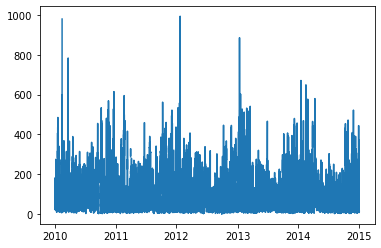

In [248]:
plt.plot(aq_df['pm2.5'])
